#  Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

# Plot

In [2]:
def Plot(INPUT,OUTPUT ,Gate_func, title):
    fig = plt.figure(figsize=(5, 5),dpi=100)
    ax = plt.subplot(111, projection="3d")
    ax.scatter(INPUT[:, 1:2], 
               INPUT[:, 2:3], OUTPUT, s=100,
               edgecolor='k', 
               c='cyan', label="Data points")
    ax.set(
        facecolor="white",  title=title,
    )
    X = np.arange(-2, 2, 0.5)
    X, Y = np.meshgrid(X, X)
    Z = np.array([[Gate_func(z, z) 
                   for z in i] for i in X])
    ax.plot_surface(X, Y, Z, alpha=0.2, color="r")
    plt.tight_layout()

# sigmoid function 

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Y = MX + C

In [4]:
def hypothysis(x, w):
    return np.dot(x, w)

# Entropy for error

In [5]:
def error_function(y, y_cap):
    error = ((-y*np.log(y_cap)-
              (1-y)*np.log(1-y_cap))**2).mean()
    return error

# Gradient Decend for optimization 

In [6]:
def gradient_decent(x, y, y_cap, alpha=0.2):
    return alpha*(x.T@(y_cap - y).T)/len(y)

# Train the Model

In [7]:
def train(x, y):
    weight=np.array([1, 1, 1])
    for z in np.arange(1,0.00001,-0.0001):
        Y = hypothysis(x, weight)
        y_cap = sigmoid(Y)
        error = error_function(y, y_cap)
        weight = weight - gradient_decent(x, y,
                                          y_cap,z)
    return weight, error

def Predict(x, w):
    return sigmoid(hypothysis(x, w))

# Calculate weight for Or

In [8]:
INPUT = np.array([[1, 0, 0], 
                  [1, 1, 0], 
                  [1, 0, 1], 
                  [1, 1, 1]])


OR = np.array([0, 1, 1, 1])

OR_Weight, OR_Error = train(INPUT, OR)

print("OR Weight", OR_Weight)
print("OR Error", OR_Error)

OR Weight [-5.50899996 11.93699295 11.93699295]
OR Error 5.3875142878775765e-06


# Create Function for OR Gate

In [9]:
def OR_GATE(x, y):
    return Predict(np.array([1, x, y]), OR_Weight)

In [10]:
OR_GATE(1,1)

0.9999999894272505

<IPython.core.display.Javascript object>


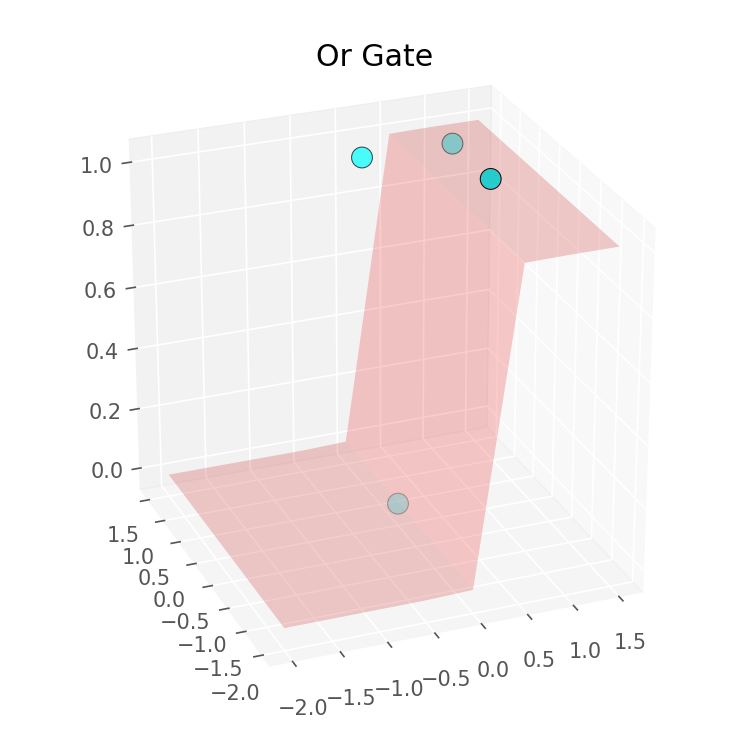

In [16]:
%matplotlib notebook
Plot(INPUT, OR, OR_GATE, "Or Gate")

# And Gate

In [12]:
AND = np.array([0, 0, 0, 1])

AND_Weight, AND_Error = train(INPUT, AND)

print("OR Weight", AND_Weight)
print("OR Error", AND_Error)

OR Weight [-16.18673667  10.67844117  10.67844117]
OR Error 1.6210841210700384e-05


In [13]:
def AND_GATE(x, y):
    return Predict(np.array([1, x, y]), AND_Weight)

In [14]:
AND_GATE(0,1)

0.004036649276391187

<IPython.core.display.Javascript object>


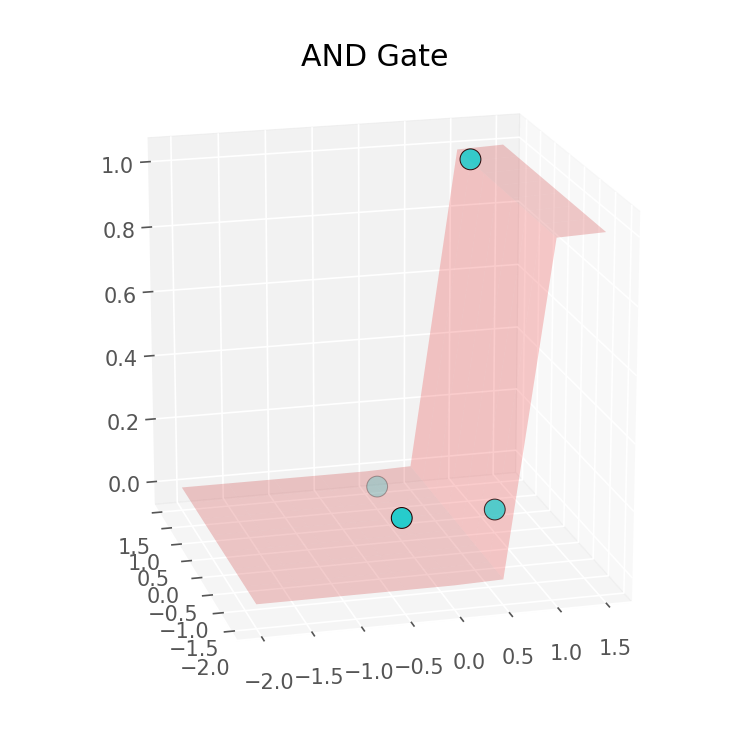

In [17]:
%matplotlib notebook
Plot(INPUT, AND, AND_GATE, "AND Gate")